In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [2]:
data=pd.read_csv("indian_liver_patient.csv")
display(data.head())
display(data.tail())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
data.shape

(583, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [6]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0],inplace=True)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder 
lc = LabelEncoder()
data['Gender']=lc.fit_transform(data['Gender'])

In [9]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


C:\Users\DEVIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


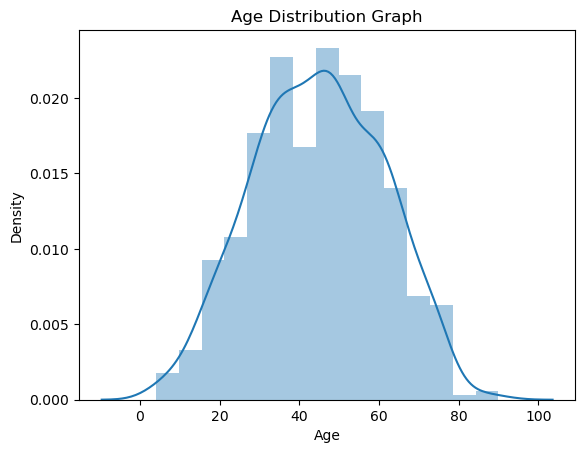

In [10]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

C:\Users\DEVIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dataset', ylabel='count'>

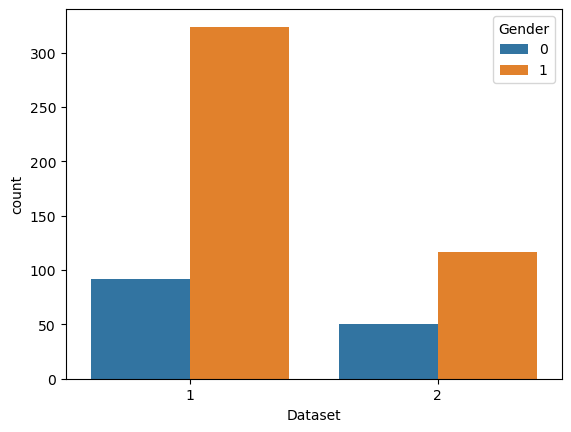

In [11]:
sns.countplot(data['Dataset'], hue=data['Gender'])

<AxesSubplot:>

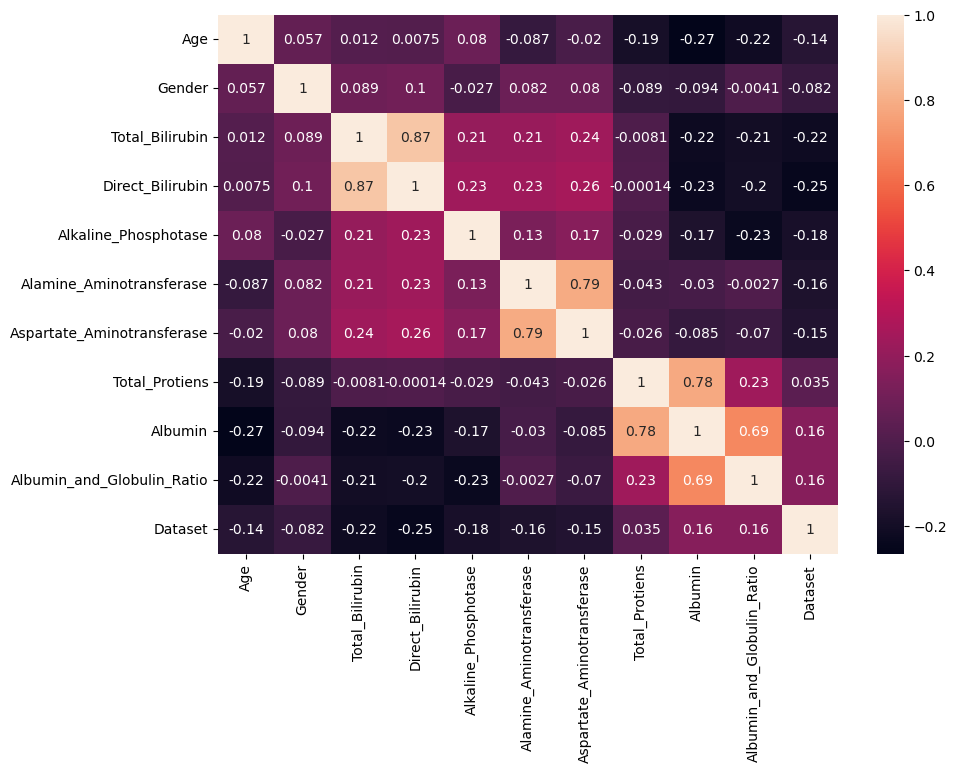

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [13]:
X=data.iloc[:,:-1]
y=data.Dataset

In [14]:
from sklearn.preprocessing import scale 
X_scaled=pd.DataFrame (scale(X), columns=X.columns)

In [15]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2,random_state=12)

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [18]:
y_train.value_counts()

1    328
2    138
Name: Dataset, dtype: int64

In [19]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [20]:
y_train_smote.value_counts()

1    328
2    328
Name: Dataset, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model1=RandomForestClassifier()
model1.fit(X_train_smote, y_train_smote)
y_predict = model1.predict(X_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test, y_predict)
print(classification_report (y_test, y_predict))

              precision    recall  f1-score   support

           1       0.82      0.73      0.77        88
           2       0.38      0.52      0.44        29

    accuracy                           0.68       117
   macro avg       0.60      0.62      0.61       117
weighted avg       0.71      0.68      0.69       117



In [22]:
from sklearn.tree import DecisionTreeClassifier 
model4 = DecisionTreeClassifier()
model4.fit(X_train_smote, y_train_smote)
y_predict=model4.predict(X_test) 
dtc1=accuracy_score(y_test,y_predict)
dtc1
pd.crosstab(y_test,y_predict) 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.77      0.69      0.73        88
           2       0.29      0.38      0.33        29

    accuracy                           0.62       117
   macro avg       0.53      0.54      0.53       117
weighted avg       0.65      0.62      0.63       117



In [23]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier() 
model2.fit(X_train_smote, y_train_smote) 
y_predict = model2.predict(X_test) 
knn1=(accuracy_score (y_test, y_predict))
knn1 
pd.crosstab(y_test,y_predict) 
print(classification_report (y_test, y_predict))

              precision    recall  f1-score   support

           1       0.83      0.56      0.67        88
           2       0.33      0.66      0.44        29

    accuracy                           0.58       117
   macro avg       0.58      0.61      0.55       117
weighted avg       0.71      0.58      0.61       117



C:\Users\DEVIL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
from sklearn.linear_model import LogisticRegression 
model5=LogisticRegression() 
model5.fit(X_train_smote, y_train_smote)
y_predict=model5.predict(X_test) 
logi1=accuracy_score(y_test, y_predict)
logi1
pd.crosstab(y_test,y_predict) 
print(classification_report (y_test, y_predict))

              precision    recall  f1-score   support

           1       0.94      0.51      0.66        88
           2       0.38      0.90      0.53        29

    accuracy                           0.61       117
   macro avg       0.66      0.70      0.60       117
weighted avg       0.80      0.61      0.63       117



In [25]:
import tensorflow.keras
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense

In [26]:
classifier=Sequential()
classifier.add(Dense(units=100,activation='relu',input_dim=10))
classifier.add(Dense(units=50,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_history=classifier.fit(X_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
4/4 [==============================] - 6s 292ms/step - loss: 1.0012 - accuracy: 0.0027 - val_loss: 0.8586 - val_accuracy: 0.0638
Epoch 2/100
4/4 [==============================] - 0s 42ms/step - loss: 0.7599 - accuracy: 0.2339 - val_loss: 0.6218 - val_accuracy: 0.5319
Epoch 3/100
4/4 [==============================] - 0s 39ms/step - loss: 0.5569 - accuracy: 0.6478 - val_loss: 0.4276 - val_accuracy: 0.6809
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 0.3915 - accuracy: 0.7070 - val_loss: 0.2566 - val_accuracy: 0.6809
Epoch 5/100
4/4 [==============================] - 0s 40ms/step - loss: 0.2408 - accuracy: 0.7097 - val_loss: 0.0926 - val_accuracy: 0.6809
Epoch 6/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0933 - accuracy: 0.7097 - val_loss: -0.0684 - val_accuracy: 0.6809
Epoch 7/100
4/4 [==============================] - 0s 38ms/step - loss: -0.0543 - accuracy: 0.7097 - val_loss: -0.2299 - val_accuracy: 0.6809
Epoch 8/100
4/4 

In [27]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\DEVIL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [28]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\DEVIL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [29]:
classifier.save("liver.h5")

In [30]:
y_pred = classifier.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [31]:
y_pred
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [32]:
def predict_exit(sample_value):
    sample_value=np.array(sample_value)
    sample_value=sample_value.reshape(1,-1)
    sample_value=scale(sample_value)
    
    return classifier.predict(sample_value)

In [33]:
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
    print('Prediction: Liver Patient')
else:
    print('Prediction: Healthy')

1/1 [==============================] - 0s 184ms/step
Prediction: Liver Patient


In [34]:
acc_smote=[['KNN Classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dtc1],['LoisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_smote,columns=['classification models','accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.581197
1,RandomForestClassifier,0.675214
2,DecisionTreeClassifier,0.615385
3,LoisticRegression,0.606838


<AxesSubplot:title={'center':'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

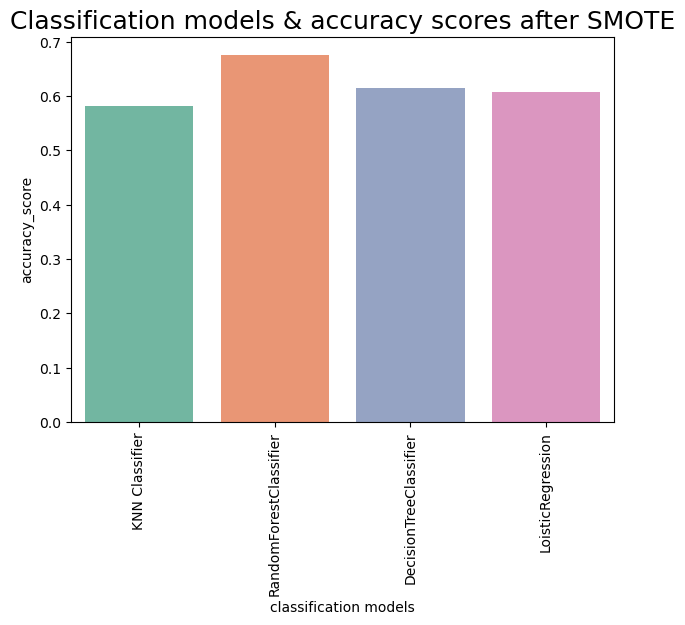

In [35]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x="classification models",y="accuracy_score", data=Liverpatient_pred,palette="Set2")

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [37]:
model.feature_importances_

array([0.12026859, 0.024727  , 0.10979189, 0.10245196, 0.11654257,
       0.11399954, 0.11870815, 0.09126762, 0.1023186 , 0.09992409])

In [38]:
dd=pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)
dd

,0
Age,0.120269
Aspartate_Aminotransferase,0.118708
Alkaline_Phosphotase,0.116543
Alamine_Aminotransferase,0.114000
Total_Bilirubin,0.109792
Direct_Bilirubin,0.102452
Albumin,0.102319
Albumin_and_Globulin_Ratio,0.099924
Total_Protiens,0.091268
Gender,0.024727


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

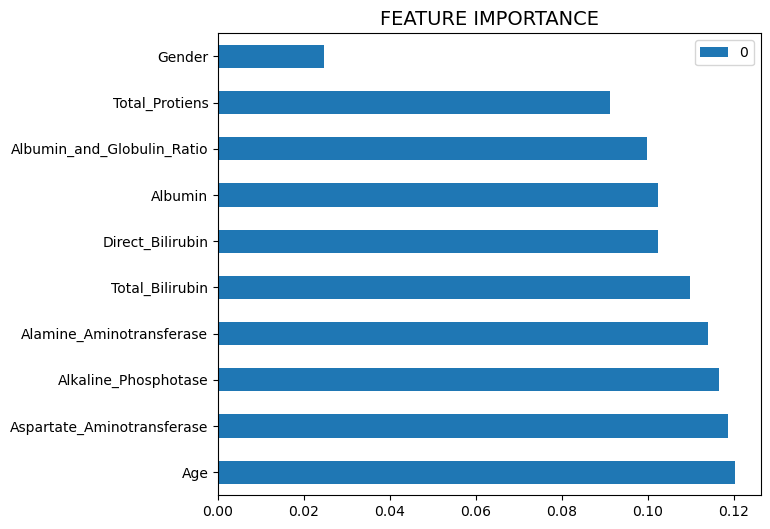

In [39]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [40]:
import joblib
joblib.dump(model1,'ETC.pkl')

['ETC.pkl']